### Graphviz 트리 구조 시각화

In [ ]:
import matplotlib.font_manager as fm

# 시스템에 설치된 모든 글꼴 목록 가져오기
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 글꼴의 이름과 파일 경로 출력
for font in font_list:
    font_prop = fm.FontProperties(fname=font)
    print(font_prop.get_name(), font)

In [2]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

# 데이터 구성:Series, DataFrame
import pandas as pd

# 배열 구성
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz

# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor

# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor

# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# 맑은 고딕 적용
matplotlib.rc("font", family = "NanumGothic")
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

#### 데이터 불러오기

In [4]:
# 데이터 불러오기
Car_raw = pd.read_csv("/home/piai/바탕화면/포빅아 28기/04. 본 교육/02. 빅데이터/02. 개인 및 팀 실습(프로젝트)/02. 팀/02. 종합실습1/02. 실습파일/Preprocessed_Car.csv", encoding='euc-kr')
Car_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Kilometer_Range_Grade
0,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,AUDI A3 35 TDI ATTRACTION,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,5
2,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
3,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
4,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2


#### 데이터 처리
각 차이가 적은 Model은 Drop  
대신 Brand 및 Location은 그대로 유지하여 Dummy

In [5]:
Car_raw.drop(columns=['Model', 'Name'], inplace=True)

In [6]:
Car_raw_dummy = pd.get_dummies(Car_raw)
Car_raw_dummy

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Kilometer_Range_Grade,Location_Ahmedabad,Location_Bangalore,...,Brand_MINI,Brand_MITSUBISHI,Brand_NISSAN,Brand_PORSCHE,Brand_RENAULT,Brand_SKODA,Brand_TATA,Brand_TOYOTA,Brand_VOLKSWAGEN,Brand_VOLVO
0,2069.50,2003,80000,12.80,1489.0,35.5,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26918.78,2014,84004,20.38,1968.0,143.0,5.0,5,1,0,...,0,0,0,0,0,0,0,0,0,0
2,25293.84,2014,79271,20.38,1968.0,143.0,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29509.48,2016,20003,20.38,1968.0,143.0,5.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28972.94,2016,39000,20.38,1968.0,143.0,5.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,26336.25,2014,86925,11.20,2400.0,215.0,5.0,5,0,0,...,0,0,0,0,0,0,0,0,0,1
7071,36147.20,2014,102001,11.10,2400.0,200.0,7.0,6,0,0,...,0,0,0,0,0,0,0,0,0,1
7072,16847.23,2016,70000,11.10,2400.0,200.0,7.0,4,0,1,...,0,0,0,0,0,0,0,0,0,1
7073,36254.50,2014,89230,11.10,2400.0,200.0,7.0,5,0,0,...,0,0,0,0,0,0,0,0,0,1


#### 데이터셋 분리

In [7]:
# 데이터셋 분리
# train/test data 분리
# X와 Y를 나누기 (예: 목표 변수 컬럼이 "Y"인 경우)
X = Car_raw_dummy.drop("Price", axis=1) # 설명 변수
Y = Car_raw_dummy["Price"] # 목표 변수

# train_test_split을 통해 훈련/테스트 세트 나누기
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(X, Y, test_size=0.3, random_state=1234)

# 훈련 및 테스트 세트 인덱스 리셋
df_train_x = df_train_x.reset_index(drop=True)
df_test_x = df_test_x.reset_index(drop=True)
df_train_y = df_train_y.reset_index(drop=True)
df_test_y = df_test_y.reset_index(drop=True)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (4952, 57)
train data Y size : (4952,)
test data X size : (2123, 57)
test data Y size : (2123,)


In [8]:
# 변수명 저장
v_feature_name = df_train_x.columns

### 의사결정나무 - 수동

In [9]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 6, min_samples_split = 14, max_depth = 10, random_state=1234, )
tree_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.883
Score on test set: 0.825


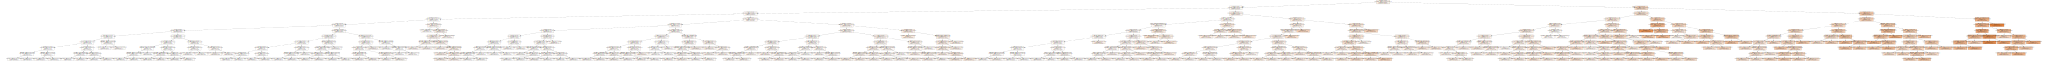

<Figure size 700x700 with 0 Axes>

In [10]:
export_graphviz(tree_final, out_file="tree_final.dot",
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
plt.figure(figsize = (7, 7))
display(graphviz.Source(dot_graph))

In [11]:
# graphviz를 pdf로 변환해 보여줌.
src = graphviz.Source(dot_graph)
src.view()

'Source.gv.pdf'

### 의사결정나무 - 자동

In [12]:
# 최적 parameter를 적용한 모델 생성 및 평가
rand_cv_dt= DecisionTreeRegressor(criterion='absolute_error', max_depth=11,
                      min_samples_leaf=7, min_samples_split=23, random_state=1234)

rand_cv_dt.fit(df_train_x, df_train_y)
rand_cv_dt.get_params()

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rand_cv_dt.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(rand_cv_dt.score(df_test_x, df_test_y)))

Score on training set: 0.843
Score on test set: 0.830


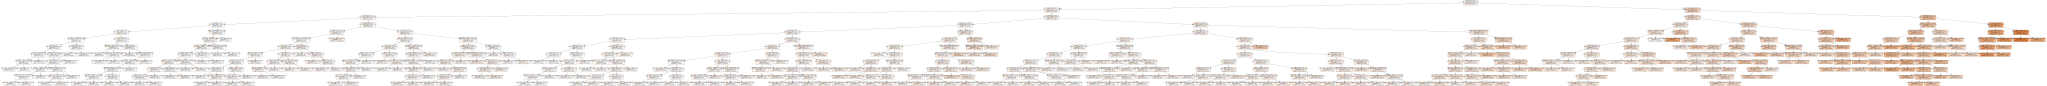

<Figure size 700x700 with 0 Axes>

In [13]:
export_graphviz(rand_cv_dt, out_file="rand_cv_dt.dot",
                feature_names = v_feature_name, impurity = True, filled = True)

with open("rand_cv_dt.dot") as f:
    dot_graph = f.read()
plt.figure(figsize = (7, 7))
display(graphviz.Source(dot_graph))

In [14]:
# graphviz를 pdf로 변환해 보여줌.
src = graphviz.Source(dot_graph)
src.view()

'Source.gv.pdf'

### 랜덤포레스트 - 수동

In [16]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators = 150, min_samples_leaf = 20,
                                 min_samples_split = 40, max_depth = 6)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.816
Score on test set: 0.836


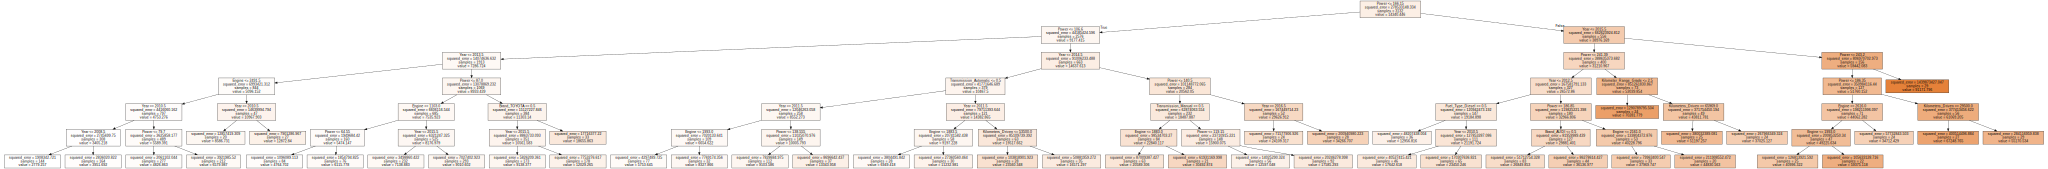

In [18]:
# 0번 트리
export_graphviz(rf_final.estimators_[0], out_file="rf_final_0.dot", feature_names = v_feature_name , 
                impurity = True, filled = True)
# tree_final_0.dot 그리기
with open("rf_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [19]:
# graphviz를 pdf로 변환해 보여줌.
src = graphviz.Source(dot_graph)
src.view()

'Source.gv.pdf'

### 랜덤포레스트 - 자동

In [20]:
# 최적 parameter를 적용한 모델 생성 및 평가
rand_cv_rf = RandomForestRegressor(max_depth=13, max_features=None, min_samples_leaf=2,
                      n_estimators=329, random_state=1234)
rand_cv_rf.fit(df_train_x, df_train_y)

rand_cv_rf.fit(df_train_x, df_train_y)
rand_cv_rf.get_params()

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rand_cv_rf.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rand_cv_rf.score(df_test_x, df_test_y)))

Score on training set: 0.949
Score on test set: 0.880


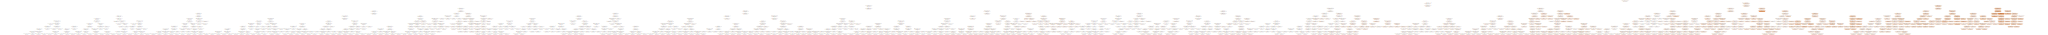

In [21]:
# 0번 트리
export_graphviz(rand_cv_rf.estimators_[0], out_file="rand_cv_rf_0.dot", feature_names = v_feature_name , 
                impurity = True, filled = True)
# tree_final_0.dot 그리기
with open("rand_cv_rf_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [22]:
# graphviz를 pdf로 변환해 보여줌.
src = graphviz.Source(dot_graph)
src.view()

'Source.gv.pdf'

### 그래디언트 부스팅 - 수동

In [26]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 180, min_samples_leaf = 67,
                                   min_samples_split = 40, max_depth = 10, learning_rate = 0.3)
gb_final.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.934
Score on test set: 0.875


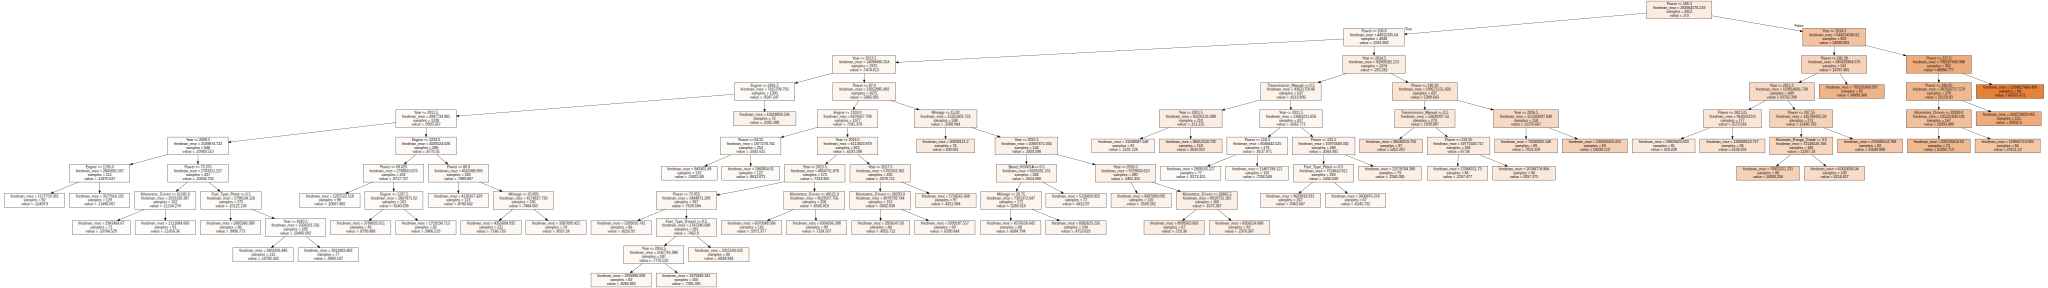

In [28]:
# 0번 트리
export_graphviz(gb_final.estimators_[0][0], out_file="gb_final_0.dot", feature_names = v_feature_name , 
                impurity = True, filled = True)
# tree_final_0.dot 그리기
with open("gb_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [29]:
# graphviz를 pdf로 변환해 보여줌.
src = graphviz.Source(dot_graph)
src.view()

'Source.gv.pdf'

### 그래디언트 부스팅 - 자동

In [31]:
# 최적 parameter를 적용한 모델 생성 및 평가
rand_cv_gb= GradientBoostingRegressor(criterion='squared_error', learning_rate=0.06,
                          max_depth=16, max_features='sqrt',
                          min_samples_leaf=15, min_samples_split=5,
                          n_estimators=435, random_state=1234)

rand_cv_gb.fit(df_train_x, df_train_y)
rand_cv_gb.get_params()

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rand_cv_gb.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(rand_cv_gb.score(df_test_x, df_test_y)))

Score on training set: 0.973
Score on test set: 0.900


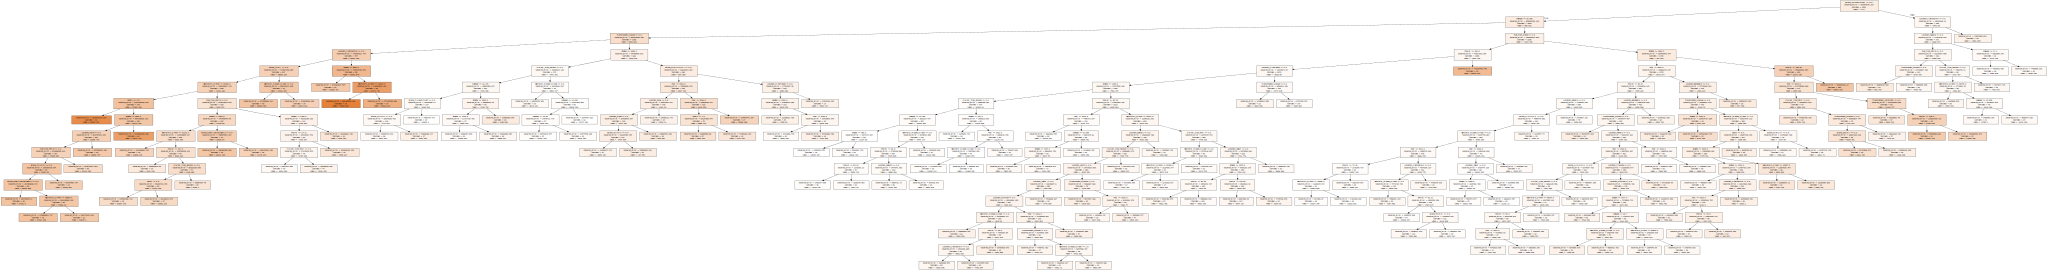

In [32]:
# 0번 트리
export_graphviz(rand_cv_gb.estimators_[0][0], out_file="rand_cv_gb_0.dot", feature_names = v_feature_name , 
                impurity = True, filled = True)
# tree_final_0.dot 그리기
with open("rand_cv_gb_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [33]:
# graphviz를 pdf로 변환해 보여줌.
src = graphviz.Source(dot_graph)
src.view()

'Source.gv.pdf'